### step : 1]- Import necessary library

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

### step : 2]- Read Dataset

In [240]:
back = pd.read_csv(r"Data_of_Attack_Back.csv")
bufferOverflow = pd.read_csv(r"Data_of_Attack_Back_BufferOverflow.csv")
ftpWrite = pd.read_csv(r"Data_of_Attack_Back_FTPWrite.csv")
guessPassword = pd.read_csv(r"Data_of_Attack_Back_GuessPassword.csv")
neptune = pd.read_csv(r"Data_of_Attack_Back_Neptune.csv")
nMap = pd.read_csv(r"Data_of_Attack_Back_NMap.csv")
normal = pd.read_csv(r"Data_of_Attack_Back_Normal.csv")
portSweep = pd.read_csv(r"Data_of_Attack_Back_PortSweep.csv")
rootKit = pd.read_csv(r"Data_of_Attack_Back_RootKit.csv")
satan = pd.read_csv(r"Data_of_Attack_Back_Satan.csv")
smurf = pd.read_csv(r"Data_of_Attack_Back_Smurf.csv")

In [241]:
back.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.001,0.001,0.1,0,0.10,0,0.0,0.0,0.0,0.0
1,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.002,0.002,0.1,0,0.05,0,0.0,0.0,0.0,0.0


In [242]:
bufferOverflow.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0184,0,0.05,0.0,0.01511,0.02957,0,0,0,0.3,...,0.001,0.003,0.1,0,0.10,0.067,0,0,0.0,0.0
1,0.0305,0,0.05,0.0,0.01735,0.02766,0,0,0,0.3,...,0.002,0.004,0.1,0,0.05,0.050,0,0,0.0,0.0


In [243]:
ftpWrite.head(2)

,0.0026,0,0.07,0.3,0.00116,0.00451,0.4,0.5,0.6,0.2,...,0.001.2,0.001.3,0.1.5,0.21,0.1.6,0.22,0.23,0.24,0.25,0.26
0,0.0134,0,0.34,0,0.00100,0.39445,0,0,0.2,0.0,...,0.002,0.001,0.05,0.1,0.05,0.000,0,0,0,0
1,0.0000,0,0.14,0,0.00613,0.00000,0,0,0.0,0.0,...,0.001,0.084,0.10,0.0,0.10,0.002,0,0,0,0


In [244]:
guessPassword.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0023,0,0.05,0.00,0.00104,0.00276,0,0,0,0.0,...,0.001,0.002,0.1,0,0.1,0.1,0.0,0.0,0.0,0.0
1,0.0060,0,0.05,0.03,0.00125,0.00179,0,0,0,0.1,...,0.001,0.001,0.1,0,0.1,0.0,0.1,0.1,0.0,0.0


In [245]:
neptune.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.001,0.002,0.1,0.0,0.10,0.100,0.1,0.050,0.0,0.0
1,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.002,0.003,0.1,0.0,0.05,0.067,0.1,0.067,0.0,0.0


In [246]:
nMap.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.003,0.001,0.033,0.100,0.033,0.0,0.0,0.0,0,0
1,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.004,0.002,0.050,0.075,0.050,0.0,0.0,0.0,0,0


In [247]:
normal.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,...,0.001,0.001,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0


In [248]:
portSweep.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0000,0.0,0.14,0.05,0.0,0.0,0,0,0,0.0,...,0.171,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.029,0.002
1,0.0001,0.0,0.14,0.08,0.0,0.0,0,0,0,0.0,...,0.172,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.030,0.003


In [249]:
rootKit.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.006,0.0,0.05,0,0.00086,0.00183,0,0,0.0,0.0,...,0.255,0.001,0.000,0.002,0.0,0.0,0,0.0,0.0,0.0
1,0.006,0.0,0.05,0,0.00090,0.00233,0,0,0.0,0.0,...,0.255,0.002,0.001,0.002,0.0,0.0,0,0.0,0.0,0.0


In [250]:
satan.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.02,0.06,0.0,0.0002,0.0,0,0,0,0.0,...,0.143,0.001,0.001,0.004,0.001,0.0,0.001,0.0,0.0,0.0
1,0.0,0.02,0.06,0.0,0.0002,0.0,0,0,0,0.0,...,0.144,0.002,0.001,0.004,0.002,0.0,0.001,0.0,0.0,0.0


In [251]:
smurf.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.146,0.001,0.001,0.002,0.001,0,0.0,0,0.0,0
1,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.147,0.002,0.001,0.002,0.001,0,0.0,0,0.0,0


### step : 3]- Sanity check of data :

In [252]:
back.shape

(968, 41)

In [253]:
bufferOverflow.shape

(30, 41)

In [254]:
ftpWrite.shape

(7, 41)

In [255]:
guessPassword.shape

(53, 41)

In [256]:
neptune.shape

(227228, 41)

In [257]:
nMap.shape

(1554, 41)

In [258]:
normal.shape

(576710, 41)

In [259]:
portSweep.shape

(2964, 41)

In [260]:
rootKit.shape

(10, 41)

In [261]:
satan.shape

(5019, 41)

In [262]:
smurf.shape

(3007, 41)

##### Reducing the data of neptune and normal table because it contains more rows than the other tables

In [263]:
neptune=resample(neptune,n_samples=2272,random_state=123)
normal=resample(normal,n_samples=5767,random_state=123)

In [264]:
neptune.shape

(2272, 41)

In [265]:
normal.shape

(5767, 41)

In [266]:
back.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      968 non-null    float64
 1    protocol_type                968 non-null    int64  
 2    service                      968 non-null    int64  
 3    flag                         968 non-null    float64
 4    src_bytes                    968 non-null    float64
 5    dst_bytes                    968 non-null    float64
 6    land                         968 non-null    int64  
 7    wrong_fragment               968 non-null    int64  
 8    urgent                       968 non-null    int64  
 9    hot                          968 non-null    float64
 10   num_failed_logins            968 non-null    int64  
 11   logged_in                    968 non-null    float64
 12   num_compromised              968 non-null    float64
 13   root

In [267]:
bufferOverflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      30 non-null     float64
 1    protocol_type                30 non-null     int64  
 2    service                      30 non-null     float64
 3    flag                         30 non-null     float64
 4    src_bytes                    30 non-null     float64
 5    dst_bytes                    30 non-null     float64
 6    land                         30 non-null     int64  
 7    wrong_fragment               30 non-null     int64  
 8    urgent                       30 non-null     int64  
 9    hot                          30 non-null     float64
 10   num_failed_logins            30 non-null     int64  
 11   logged_in                    30 non-null     float64
 12   num_compromised              30 non-null     float64
 13   root_s

In [268]:
ftpWrite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0.0026    7 non-null      float64
 1    0        7 non-null      int64  
 2    0.07     7 non-null      float64
 3    0.3      7 non-null      int64  
 4    0.00116  7 non-null      float64
 5    0.00451  7 non-null      float64
 6    0.4      7 non-null      int64  
 7    0.5      7 non-null      int64  
 8    0.6      7 non-null      float64
 9    0.2      7 non-null      float64
 10   0.7      7 non-null      int64  
 11   0.1      7 non-null      float64
 12   0.8      7 non-null      float64
 13   0.9      7 non-null      int64  
 14   0.10     7 non-null      int64  
 15   0.11     7 non-null      float64
 16   0.1.1    7 non-null      float64
 17   0.12     7 non-null      int64  
 18   0.1.2    7 non-null      float64
 19   0.13     7 non-null      int64  
 20   0.14     7 non-null      int64  
 2

In [269]:
guessPassword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      53 non-null     float64
 1    protocol_type                53 non-null     int64  
 2    service                      53 non-null     float64
 3    flag                         53 non-null     float64
 4    src_bytes                    53 non-null     float64
 5    dst_bytes                    53 non-null     float64
 6    land                         53 non-null     int64  
 7    wrong_fragment               53 non-null     int64  
 8    urgent                       53 non-null     int64  
 9    hot                          53 non-null     float64
 10   num_failed_logins            53 non-null     float64
 11   logged_in                    53 non-null     float64
 12   num_compromised              53 non-null     int64  
 13   root_s

In [270]:
neptune.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2272 entries, 15725 to 83063
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      2272 non-null   float64
 1    protocol_type                2272 non-null   int64  
 2    service                      2272 non-null   float64
 3    flag                         2272 non-null   float64
 4    src_bytes                    2272 non-null   float64
 5    dst_bytes                    2272 non-null   float64
 6    land                         2272 non-null   int64  
 7    wrong_fragment               2272 non-null   int64  
 8    urgent                       2272 non-null   int64  
 9    hot                          2272 non-null   int64  
 10   num_failed_logins            2272 non-null   int64  
 11   logged_in                    2272 non-null   float64
 12   num_compromised              2272 non-null   int64  
 13   ro

In [271]:
nMap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      1554 non-null   int64  
 1    protocol_type                1554 non-null   float64
 2    service                      1554 non-null   float64
 3    flag                         1554 non-null   float64
 4    src_bytes                    1554 non-null   float64
 5    dst_bytes                    1554 non-null   float64
 6    land                         1554 non-null   int64  
 7    wrong_fragment               1554 non-null   int64  
 8    urgent                       1554 non-null   int64  
 9    hot                          1554 non-null   int64  
 10   num_failed_logins            1554 non-null   int64  
 11   logged_in                    1554 non-null   int64  
 12   num_compromised              1554 non-null   int64  
 13   ro

In [272]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5767 entries, 277869 to 468525
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      5767 non-null   float64
 1    protocol_type                5767 non-null   float64
 2    service                      5767 non-null   float64
 3    flag                         5767 non-null   float64
 4    src_bytes                    5767 non-null   float64
 5    dst_bytes                    5767 non-null   float64
 6    land                         5767 non-null   int64  
 7    wrong_fragment               5767 non-null   int64  
 8    urgent                       5767 non-null   float64
 9    hot                          5767 non-null   float64
 10   num_failed_logins            5767 non-null   float64
 11   logged_in                    5767 non-null   float64
 12   num_compromised              5767 non-null   float64
 13   

In [273]:
portSweep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      2964 non-null   float64
 1    protocol_type                2964 non-null   float64
 2    service                      2964 non-null   float64
 3    flag                         2964 non-null   float64
 4    src_bytes                    2964 non-null   float64
 5    dst_bytes                    2964 non-null   float64
 6    land                         2964 non-null   int64  
 7    wrong_fragment               2964 non-null   int64  
 8    urgent                       2964 non-null   int64  
 9    hot                          2964 non-null   float64
 10   num_failed_logins            2964 non-null   int64  
 11   logged_in                    2964 non-null   float64
 12   num_compromised              2964 non-null   int64  
 13   ro

In [274]:
rootKit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      10 non-null     float64
 1    protocol_type                10 non-null     float64
 2    service                      10 non-null     float64
 3    flag                         10 non-null     int64  
 4    src_bytes                    10 non-null     float64
 5    dst_bytes                    10 non-null     float64
 6    land                         10 non-null     int64  
 7    wrong_fragment               10 non-null     int64  
 8    urgent                       10 non-null     float64
 9    hot                          10 non-null     float64
 10   num_failed_logins            10 non-null     float64
 11   logged_in                    10 non-null     float64
 12   num_compromised              10 non-null     float64
 13   root_sh

In [275]:
satan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      5019 non-null   float64
 1    protocol_type                5019 non-null   float64
 2    service                      5019 non-null   float64
 3    flag                         5019 non-null   float64
 4    src_bytes                    5019 non-null   float64
 5    dst_bytes                    5019 non-null   float64
 6    land                         5019 non-null   int64  
 7    wrong_fragment               5019 non-null   int64  
 8    urgent                       5019 non-null   int64  
 9    hot                          5019 non-null   float64
 10   num_failed_logins            5019 non-null   float64
 11   logged_in                    5019 non-null   float64
 12   num_compromised              5019 non-null   float64
 13   ro

In [276]:
smurf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      3007 non-null   int64  
 1    protocol_type                3007 non-null   float64
 2    service                      3007 non-null   float64
 3    flag                         3007 non-null   int64  
 4    src_bytes                    3007 non-null   float64
 5    dst_bytes                    3007 non-null   int64  
 6    land                         3007 non-null   int64  
 7    wrong_fragment               3007 non-null   float64
 8    urgent                       3007 non-null   int64  
 9    hot                          3007 non-null   int64  
 10   num_failed_logins            3007 non-null   int64  
 11   logged_in                    3007 non-null   int64  
 12   num_compromised              3007 non-null   int64  
 13   ro

##### Creating new column Attack

In [277]:
back["Attack"] = 1
bufferOverflow["Attack"] = 1
ftpWrite["Attack"] = 1
guessPassword["Attack"] = 1
neptune["Attack"] = 1
nMap["Attack"] =  1
normal["Attack"] = 0
portSweep["Attack"] = 1
rootKit["Attack"] = 1
satan["Attack"] = 1
smurf["Attack"] = 1

##### Making the columns of ftpWrite table same as other tables

In [278]:
ftpWrite.columns = back.columns

##### Concating all the tables

In [279]:
df = pd.concat([back, bufferOverflow, ftpWrite, guessPassword, neptune, nMap, normal, portSweep, rootKit, satan, smurf], axis=0)

In [280]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.005,0.100,0.000,0.020,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,1
3003,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,1
3004,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,1
3005,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,1


### step : 4]- Exploratory Data Analysis (EDA)

In [281]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,21651.0,0.015453,0.116363,0.000,0.000,0.00000,0.0000,1.000
protocol_type,21651.0,0.004816,0.007908,0.000,0.000,0.00000,0.0100,0.020
service,21651.0,0.086203,0.085222,0.000,0.000,0.09000,0.1200,0.670
flag,21651.0,0.027090,0.033452,0.000,0.000,0.00000,0.0600,0.100
src_bytes,21651.0,0.027304,0.113245,0.000,0.000,0.00008,0.0032,1.000
dst_bytes,21651.0,0.013170,0.046113,0.000,0.000,0.00000,0.0033,1.000
land,21651.0,0.000000,0.000000,0.000,0.000,0.00000,0.0000,0.000
wrong_fragment,21651.0,0.000014,0.002039,0.000,0.000,0.00000,0.0000,0.300
urgent,21651.0,0.000018,0.001665,0.000,0.000,0.00000,0.0000,0.200
hot,21651.0,0.010401,0.051588,0.000,0.000,0.00000,0.0000,1.000


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21651 entries, 0 to 3006
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      21651 non-null  float64
 1    protocol_type                21651 non-null  float64
 2    service                      21651 non-null  float64
 3    flag                         21651 non-null  float64
 4    src_bytes                    21651 non-null  float64
 5    dst_bytes                    21651 non-null  float64
 6    land                         21651 non-null  int64  
 7    wrong_fragment               21651 non-null  float64
 8    urgent                       21651 non-null  float64
 9    hot                          21651 non-null  float64
 10   num_failed_logins            21651 non-null  float64
 11   logged_in                    21651 non-null  float64
 12   num_compromised              21651 non-null  float64
 13   root_s

From the above line, we can see that there are no missing values in our data so we don't require missing values imputation

In [283]:
df.isnull().sum().sum()

0

In [284]:
#  To check the distribution of the 'Attack' column

print(df['Attack'].value_counts(normalize=True))

Attack
1    0.733638
0    0.266362
Name: proportion, dtype: float64


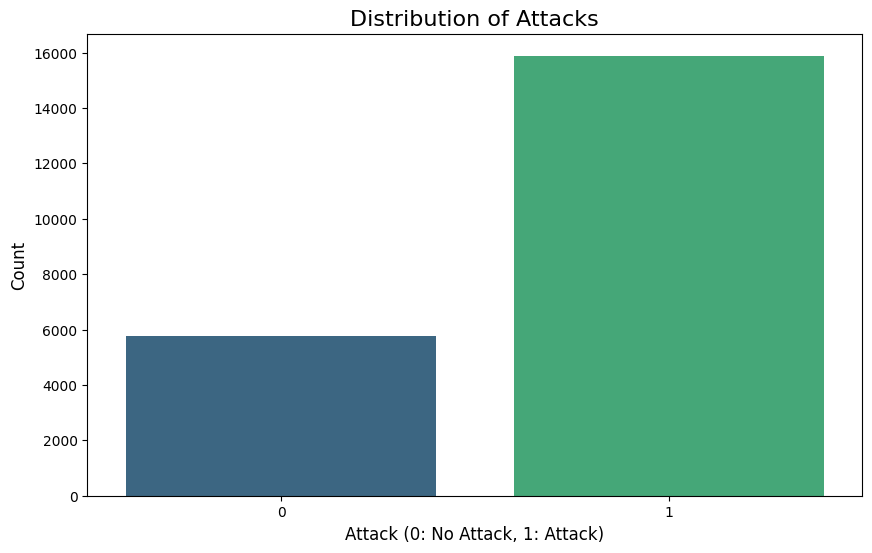

In [285]:
# countplot for the 'Attack' column

plt.figure(figsize=(10, 6))
sns.countplot(x='Attack', data=df, palette='viridis')
plt.title('Distribution of Attacks', fontsize=16)
plt.xlabel('Attack (0: No Attack, 1: Attack)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

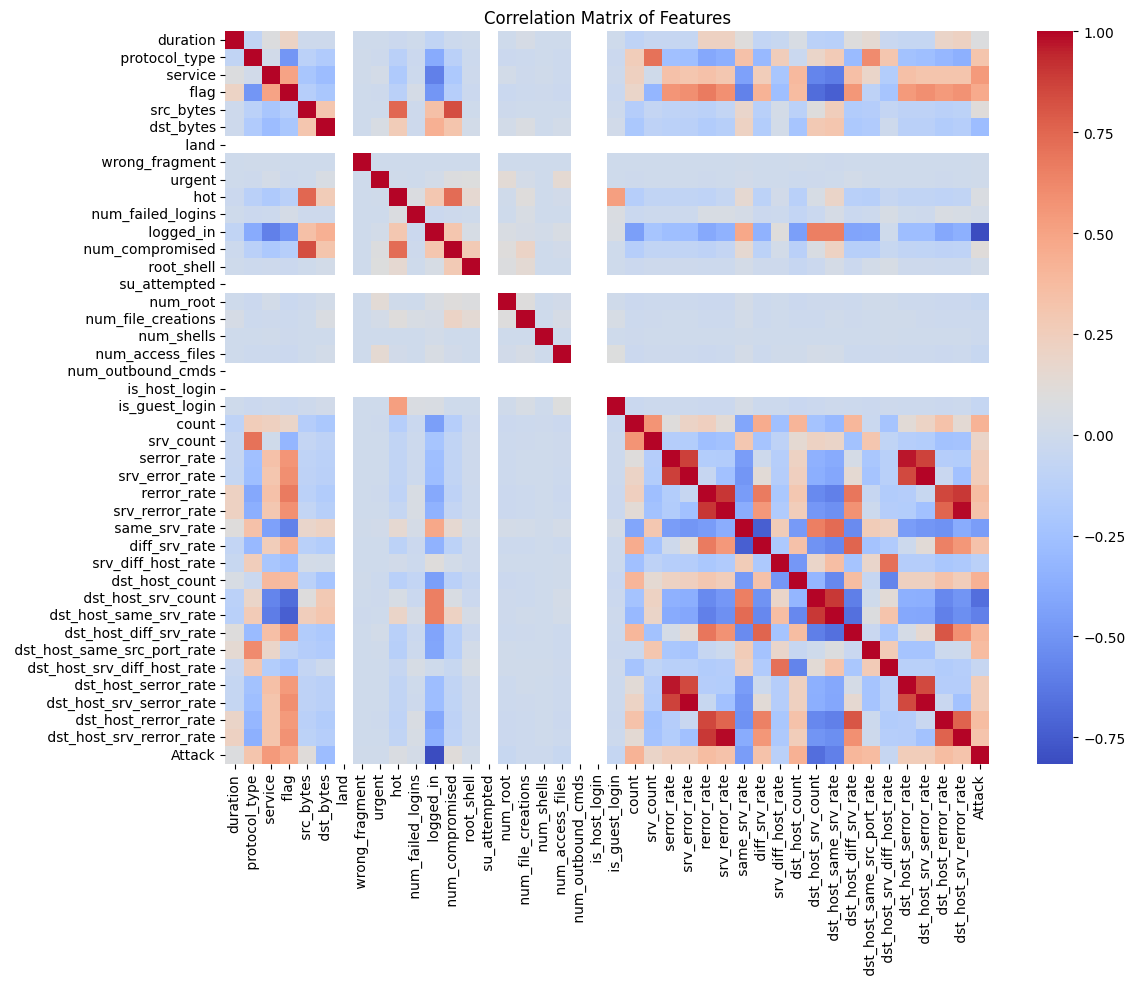

In [286]:
# To display correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

##### Calculating various statistical measures and quantiles

In [287]:
def summary(x):
    
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3-1.5*iqr
    
    return pd.Series(data=[x.sum(),x.count(),x.dtypes,x.mean(),x.std(),x.nunique(),lower,upper,iqr,
                           x.quantile(0.01),x.quantile(0.05),x.quantile(0.1),x.quantile(0.25),x.quantile(0.5)
                           ,x.quantile(0.75),x.quantile(0.9),x.quantile(0.95),x.quantile(0.99),x.min(),x.max()],
                    index=["total","count","dtypes","mean","std","nunique","lower","upper","iqr","p1"
                    ,"p5","p10","p25","p50","p75","p90","p95","p99","min","max"])

In [288]:
df.apply(summary).T

,total,count,dtypes,mean,std,nunique,lower,upper,iqr,p1,p5,p10,p25,p50,p75,p90,p95,p99,min,max
duration,334.5641,21651,float64,0.015453,0.116363,328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0002,0.9645,0.0,1.0
protocol_type,104.28,21651,float64,0.004816,0.007908,3,-0.015,-0.005,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.02,0.02,0.02,0.0,0.02
service,1866.38,21651,float64,0.086203,0.085222,67,-0.18,-0.06,0.12,0.0,0.0,0.0,0.0,0.09,0.12,0.12,0.14,0.51,0.0,0.67
flag,586.52,21651,float64,0.02709,0.033452,11,-0.09,-0.03,0.06,0.0,0.0,0.0,0.0,0.0,0.06,0.08,0.08,0.1,0.0,0.1
src_bytes,591.16892,21651,float64,0.027304,0.113245,964,-0.0048,-0.0016,0.0032,0.0,0.0,0.0,0.0,0.00008,0.0032,0.01032,0.038565,0.5454,0.0,1.0
dst_bytes,285.15206,21651,float64,0.01317,0.046113,2814,-0.00495,-0.00165,0.0033,0.0,0.0,0.0,0.0,0.0,0.0033,0.04031,0.08314,0.17749,0.0,1.0
land,0,21651,int64,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
wrong_fragment,0.3,21651,float64,0.000014,0.002039,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
urgent,0.4,21651,float64,0.000018,0.001665,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
hot,225.2,21651,float64,0.010401,0.051588,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.0,1.0


In [289]:
df.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'Attack'],
      dtype='object')

In [290]:
# some column names have spaces that was giving some error that's why I'm using below line.

df.columns = df.columns.str.replace(" ","")

In [291]:
cat_col = ["protocol_type", "service", "flag", "land", "logged_in", "root_shell", "su_attempted", "is_host_login", "is_guest_login"]

In [292]:
num_col = df.drop(columns=cat_col + ["Attack"])

In [293]:
df_cat = df[cat_col]

In [294]:
df_cat

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login
0,0.00,0.00,0.0,0,0.1,0.0,0.0,0.0,0.0
1,0.00,0.00,0.0,0,0.1,0.0,0.0,0.0,0.0
2,0.00,0.00,0.0,0,0.1,0.0,0.0,0.0,0.0
3,0.00,0.00,0.0,0,0.1,0.0,0.0,0.0,0.0
4,0.00,0.00,0.0,0,0.1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3002,0.02,0.09,0.0,0,0.0,0.0,0.0,0.0,0.0
3003,0.02,0.09,0.0,0,0.0,0.0,0.0,0.0,0.0
3004,0.02,0.09,0.0,0,0.0,0.0,0.0,0.0,0.0
3005,0.02,0.09,0.0,0,0.0,0.0,0.0,0.0,0.0


### step : 5]- Encoding of data

In [295]:
from sklearn.preprocessing import LabelEncoder

In [296]:
le = LabelEncoder()

In [297]:
for i in cat_col:
    df[i] = le.fit_transform(df[i])

### step : 6]- Outlier Treatments :

In [298]:
num_col = num_col.clip(lower=num_col.quantile(0.01), upper=num_col.quantile(0.99), axis=1)
df = pd.concat([df_cat, num_col, df["Attack"]], axis=1)

In [299]:
df.head()

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,duration,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.0,0.0,0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,1


In [300]:
df.apply(summary).T

,total,count,dtypes,mean,std,nunique,lower,upper,iqr,p1,p5,p10,p25,p50,p75,p90,p95,p99,min,max
protocol_type,104.28,21651,float64,0.004816,0.007908,3,-0.015,-0.005,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.02,0.02,0.02,0.0,0.02
service,1866.38,21651,float64,0.086203,0.085222,67,-0.18,-0.06,0.12,0.0,0.0,0.0,0.0,0.09,0.12,0.12,0.14,0.51,0.0,0.67
flag,586.52,21651,float64,0.02709,0.033452,11,-0.09,-0.03,0.06,0.0,0.0,0.0,0.0,0.0,0.06,0.08,0.08,0.1,0.0,0.1
land,0,21651,int64,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
logged_in,627.8,21651,float64,0.028996,0.045376,2,-0.15,-0.05,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.1
root_shell,2.0,21651,float64,0.000092,0.003038,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
su_attempted,0.0,21651,float64,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
is_host_login,0.0,21651,float64,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
is_guest_login,3.5,21651,float64,0.000162,0.004017,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
duration,327.1636,21651,float64,0.015111,0.113488,312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0002,0.964,0.0,0.9645


### step : 7]- Building a model :

#### Binomial classification

In [301]:
X = df.iloc[:,:-1]
y = df["Attack"]

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

In [304]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17320, 41), (4331, 41), (17320,), (4331,))

In [305]:
from sklearn.preprocessing import StandardScaler

In [306]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [307]:
# To create a dataframe for the X_train_scaled

#X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
#X_train_scaled

In [308]:
# To create a dataframe for the X_test_scaled

#X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_train.columns)
#X_test_scaled

##### Logistic Regression

In [309]:
from sklearn.linear_model import LogisticRegression

In [310]:
logr = LogisticRegression(random_state=42, max_iter=1000)
logr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [311]:
logr.score(X_train_scaled, y_train)*100, logr.score(X_test_scaled, y_test)*100

(99.41685912240185, 99.07642576772108)

In [312]:
y_pred = logr.predict(X_test_scaled)

In [313]:
# Print the classification report

print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1147
           1       0.99      1.00      0.99      3184

    accuracy                           0.99      4331
   macro avg       0.99      0.99      0.99      4331
weighted avg       0.99      0.99      0.99      4331



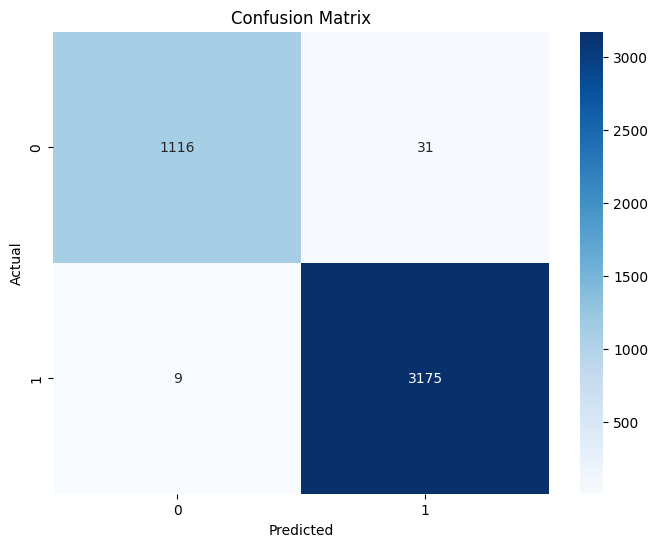

In [314]:
# Create a confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix visualizes the model's predictions:</br>

True Negatives (correctly identified normal activities): 1116</br>
False Positives (normal activities misclassified as attacks): 31</br>
False Negatives (attacks misclassified as normal activities): 9</br>
True Positives (correctly identified attacks): 3175</br>
The model shows a very low error rate, with only a few misclassifications in both directions.

In [315]:
predict_train_logr = pd.DataFrame(logr.predict_proba(X_train_scaled))[1]
predict_train_logr

0        0.991854
1        0.995490
2        0.997238
3        0.999341
4        0.999297
           ...   
17315    1.000000
17316    0.997788
17317    0.999969
17318    0.999970
17319    0.999501
Name: 1, Length: 17320, dtype: float64

In [316]:
roc_auc_score(y_train, predict_train_logr)

0.9986122473327198

In [317]:
predict_test_logr = pd.DataFrame(logr.predict_proba(X_test_scaled))[1]
predict_test_logr

0       0.999999
1       0.999998
2       0.999573
3       0.000059
4       0.999999
          ...   
4326    0.999968
4327    0.001352
4328    0.999982
4329    0.999791
4330    0.000240
Name: 1, Length: 4331, dtype: float64

In [318]:
roc_auc_score(y_test, predict_test_logr)

0.9987275632740862

##### RandomForestClassifier

In [319]:
from sklearn.ensemble import RandomForestClassifier

In [320]:
rc = RandomForestClassifier(n_estimators=100, random_state=42)
rc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [321]:
rc.score(X_train_scaled, y_train)*100, rc.score(X_test_scaled, y_test)*100

(100.0, 99.86146386515816)

In [322]:
y_pred_rc = rc.predict(X_test_scaled)

In [323]:
# Print the classification report

print('Classification Report:')
print(classification_report(y_test, y_pred_rc))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1147
           1       1.00      1.00      1.00      3184

    accuracy                           1.00      4331
   macro avg       1.00      1.00      1.00      4331
weighted avg       1.00      1.00      1.00      4331



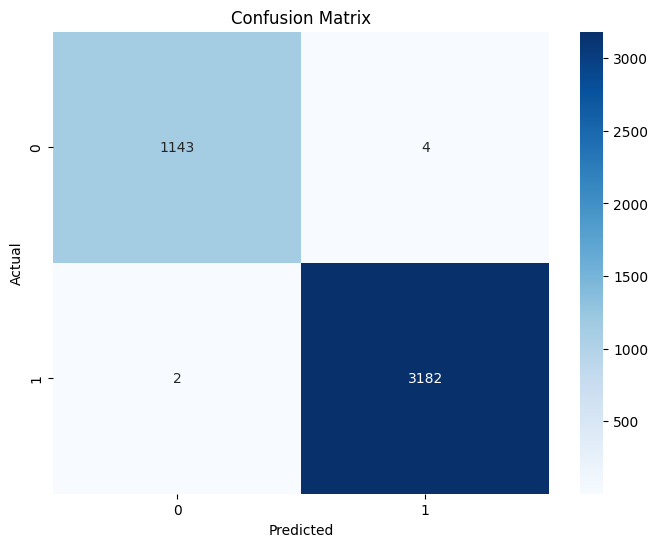

In [324]:
# Create a confusion matrix

cm_rc = confusion_matrix(y_test, y_pred_rc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rc, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix visualizes the model's predictions:</br>

True Negatives (correctly identified normal activities): 1143</br>
False Positives (normal activities misclassified as attacks): 2</br>
False Negatives (attacks misclassified as normal activities): 4</br>
True Positives (correctly identified attacks): 3182</br>
The model shows a very low error rate, with only a few misclassifications in both directions.

In [325]:
predict_train_rc = pd.DataFrame(rc.predict_proba(X_train_scaled))[1]
predict_train_rc

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
17315    1.0
17316    1.0
17317    1.0
17318    1.0
17319    1.0
Name: 1, Length: 17320, dtype: float64

In [326]:
roc_auc_score(y_train, predict_train_rc)

1.0

In [327]:
predict_test_rc = pd.DataFrame(rc.predict_proba(X_test_scaled))[1]
predict_test_rc

0       1.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
4326    1.0
4327    0.0
4328    1.0
4329    1.0
4330    0.0
Name: 1, Length: 4331, dtype: float64

In [328]:
roc_auc_score(y_test, predict_test_rc)

0.9999920592500426

##### As there is only a litte difference between Logistic Regression and Random Forest, so we go with Logistic Regression as our final model.

#### Multinomial Classification

In [329]:
back['Attack'] = 'Back'
bufferOverflow['Attack'] = "BufferOverflow"
ftpWrite['Attack'] = "FTPWrite"
guessPassword['Attack'] = "GuessPassword"
neptune['Attack'] = 'Neptune'
nMap['Attack'] = 'NMap'
normal['Attack'] = 'Normal'
portSweep['Attack'] = 'PortSweep'
rootKit['Attack'] = 'RootKit'
satan['Attack'] = 'Satan'
smurf['Attack'] = 'Smurf'

In [330]:
ftpWrite.columns = back.columns

In [331]:
df_2 = pd.concat([back, bufferOverflow, ftpWrite, guessPassword, neptune, nMap, normal, portSweep, rootKit, satan, smurf], axis=0)

In [332]:
df_2['Attack'] = df_2['Attack'].map({'Normal':0, 'Back':1, 'BufferOverflow':2,'FTPWrite':3,'GuessPassword':4,'Neptune':5,'NMap':6,'PortSweep':7,'RootKit':8,'Satan':9,'Smurf':10}).astype(int)

In [333]:
df_2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.005,0.100,0.000,0.020,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,10
3003,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,10
3004,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,10
3005,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,10


In [334]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21651 entries, 0 to 3006
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      21651 non-null  float64
 1    protocol_type                21651 non-null  float64
 2    service                      21651 non-null  float64
 3    flag                         21651 non-null  float64
 4    src_bytes                    21651 non-null  float64
 5    dst_bytes                    21651 non-null  float64
 6    land                         21651 non-null  int64  
 7    wrong_fragment               21651 non-null  float64
 8    urgent                       21651 non-null  float64
 9    hot                          21651 non-null  float64
 10   num_failed_logins            21651 non-null  float64
 11   logged_in                    21651 non-null  float64
 12   num_compromised              21651 non-null  float64
 13   root_s

In [335]:
#  To check the distribution of the 'Attack' column

print(df_2['Attack'].value_counts(normalize=True))

Attack
0     0.266362
9     0.231814
10    0.138885
7     0.136899
5     0.104937
6     0.071775
1     0.044709
4     0.002448
2     0.001386
8     0.000462
3     0.000323
Name: proportion, dtype: float64


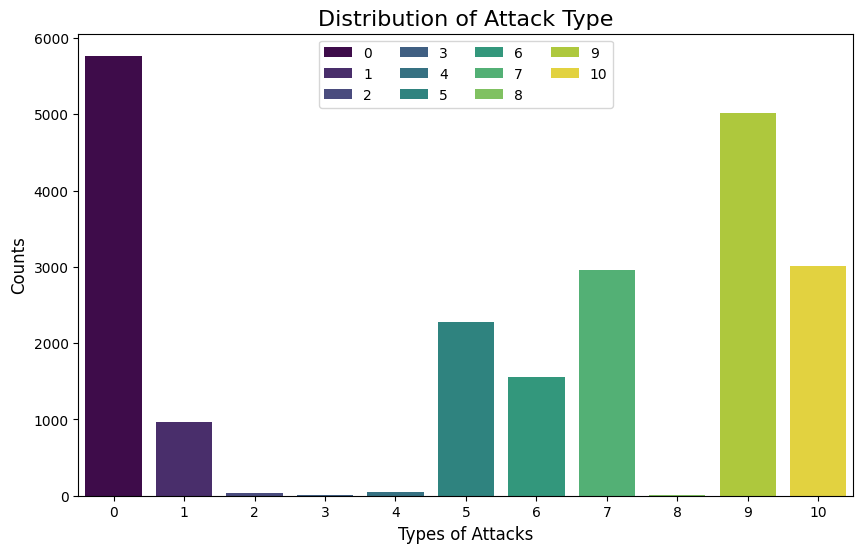

In [336]:
# countplot for the 'Attack' column

plt.figure(figsize=(10, 6))
sns.countplot(x='Attack', data=df_2, palette='viridis', hue='Attack', legend='full')
plt.legend(loc='upper center', ncol=4)
plt.title('Distribution of Attack Type', fontsize=16)
plt.xlabel('Types of Attacks', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

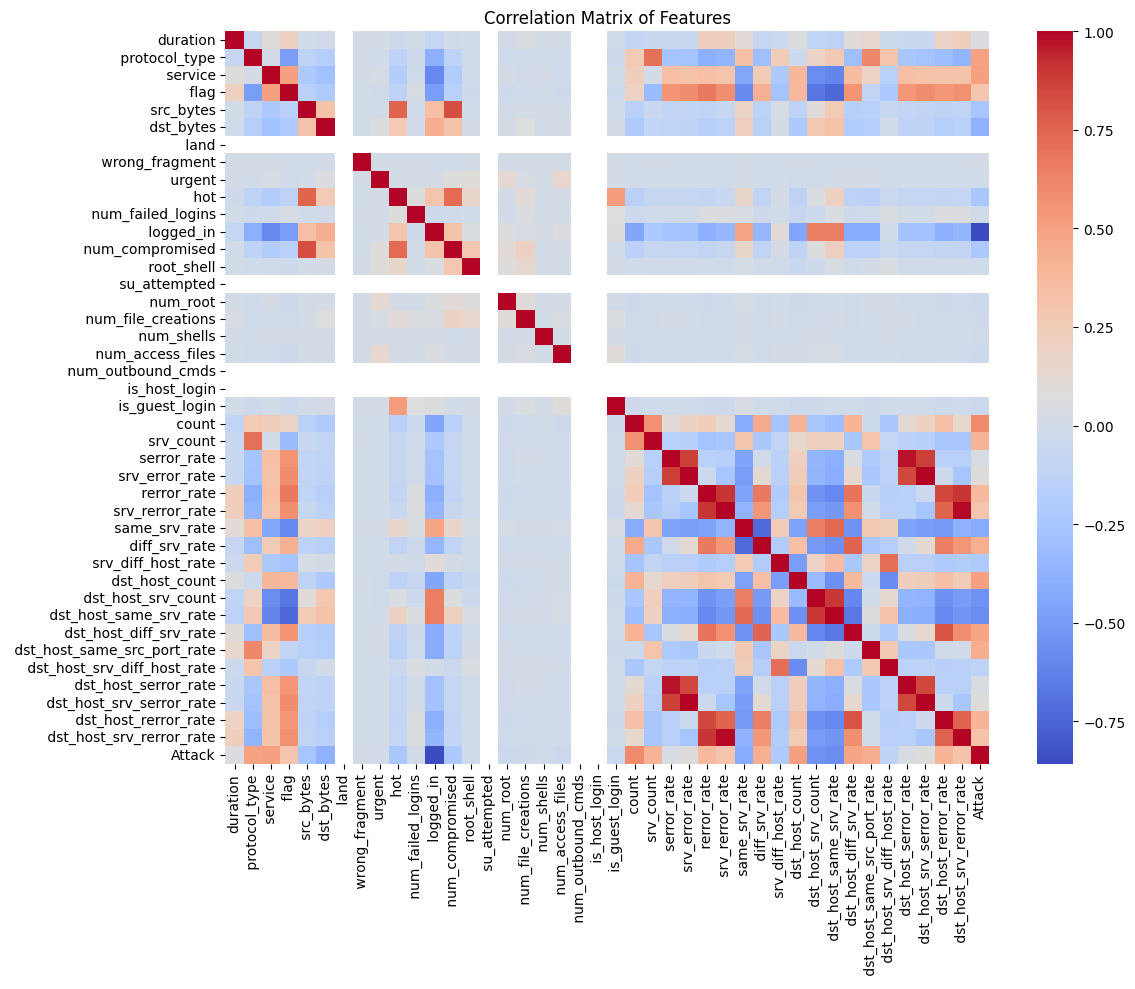

In [337]:
# To display correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(df_2.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

In [338]:
cat_col_2=["protocol_type", "service", "flag", "land", "logged_in", "root_shell", "su_attempted", "is_host_login", "is_guest_login"]

In [339]:
df_2.columns = df_2.columns.str.replace(" ","")

In [340]:
df_2.apply(summary).T

,total,count,dtypes,mean,std,nunique,lower,upper,iqr,p1,p5,p10,p25,p50,p75,p90,p95,p99,min,max
duration,334.5641,21651,float64,0.015453,0.116363,328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0002,0.9645,0.0,1.0
protocol_type,104.28,21651,float64,0.004816,0.007908,3,-0.015,-0.005,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.02,0.02,0.02,0.0,0.02
service,1866.38,21651,float64,0.086203,0.085222,67,-0.18,-0.06,0.12,0.0,0.0,0.0,0.0,0.09,0.12,0.12,0.14,0.51,0.0,0.67
flag,586.52,21651,float64,0.02709,0.033452,11,-0.09,-0.03,0.06,0.0,0.0,0.0,0.0,0.0,0.06,0.08,0.08,0.1,0.0,0.1
src_bytes,591.16892,21651,float64,0.027304,0.113245,964,-0.0048,-0.0016,0.0032,0.0,0.0,0.0,0.0,0.00008,0.0032,0.01032,0.038565,0.5454,0.0,1.0
dst_bytes,285.15206,21651,float64,0.01317,0.046113,2814,-0.00495,-0.00165,0.0033,0.0,0.0,0.0,0.0,0.0,0.0033,0.04031,0.08314,0.17749,0.0,1.0
land,0,21651,int64,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
wrong_fragment,0.3,21651,float64,0.000014,0.002039,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
urgent,0.4,21651,float64,0.000018,0.001665,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
hot,225.2,21651,float64,0.010401,0.051588,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.0,1.0


In [341]:
for i in cat_col_2:
    le = LabelEncoder()
    df_2[i] = le.fit_transform(df_2[i])

In [342]:
df_2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0,0,0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0,0,0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0,0,0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0,0,0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0,0,0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.005,0.100,0.000,0.020,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0,2,9,0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,10
3003,0.0,2,9,0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,10
3004,0.0,2,9,0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,10
3005,0.0,2,9,0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,10


In [343]:
# Creating new variables for continuous and categorical features.

df_2_cat_col = df_2[cat_col_2 + ["Attack"]]
df_2_num_col = df_2.drop(columns=df_2_cat_col)

In [344]:
# Outlier Treatment

df_2_num_col = df_2_num_col.clip(lower=df_2_num_col.quantile(0.01),upper=df_2_num_col.quantile(0.99),axis=1)

In [345]:
# Appending continuous and categorical variables.

df_2 = pd.concat([df_2_num_col, df_2_cat_col],axis=1)

In [346]:
# Creating feature and target variables.

feature = df_2.iloc[:,:-1]
target = df_2["Attack"]

In [347]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(feature, target, test_size=0.2, random_state = 123)

In [348]:
# Scaling our data

ss_2 = StandardScaler()
X_train_scaled_2 = ss.fit_transform(X_train_2)
X_test_scaled_2 = ss.transform(X_test_2)

##### KNN

In [349]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [350]:
param_grid = {'n_neighbors':[3,5,7,9],
              'weights':['uniform','distance'],
              'algorithm': ['ball_tree', 'kd_tree']}

In [351]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled_2, y_train_2)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [352]:
grid_search.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}

In [353]:
knc_bp = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, weights='uniform')
knc_bp.fit(X_train_scaled_2, y_train_2)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

In [354]:
knc_bp.score(X_train_scaled_2, y_train_2)*100, knc_bp.score(X_test_scaled_2, y_test_2)*100

(99.6593533487298, 99.37658739321172)

In [355]:
y_pred_knc = knc_bp.predict(X_test_scaled_2)

In [356]:
# Print the classification report

print('Classification Report:')
print(classification_report(y_test_2, y_pred_knc))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1147
           1       1.00      1.00      1.00       178
           2       1.00      1.00      1.00         7
           3       0.00      0.00      0.00         3
           4       1.00      0.92      0.96        13
           5       1.00      1.00      1.00       440
           6       0.97      0.99      0.98       314
           7       1.00      1.00      1.00       600
           8       0.00      0.00      0.00         1
           9       0.99      0.99      0.99       993
          10       1.00      1.00      1.00       635

    accuracy                           0.99      4331
   macro avg       0.81      0.81      0.81      4331
weighted avg       0.99      0.99      0.99      4331



In [357]:
predict_train_2 = pd.DataFrame(knc_bp.predict_proba(X_train_scaled_2), columns=['Normal', 'Back', 'BufferOverflow', 'FTPWrite', 'GuessPassword', 'Neptune', 'NMap', 'PortSweep', 'RootKit', 'Satan', 'Smurf'])
predict_train_2

,Normal,Back,BufferOverflow,FTPWrite,GuessPassword,Neptune,NMap,PortSweep,RootKit,Satan,Smurf
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [358]:
roc_auc_score(y_train_2, predict_train_2, multi_class="ovo")

0.9982439831967141

In [359]:
predict_test_2=pd.DataFrame(knc_bp.predict_proba(X_test_scaled_2), columns=['Normal', 'Back', 'BufferOverflow', 'FTPWrite', 'GuessPassword', 'Neptune', 'NMap', 'PortSweep', 'RootKit', 'Satan', 'Smurf'])
predict_test_2

,Normal,Back,BufferOverflow,FTPWrite,GuessPassword,Neptune,NMap,PortSweep,RootKit,Satan,Smurf
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4327,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4329,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [360]:
roc_auc_score(y_test_2, predict_test_2, multi_class="ovo")

0.9606976392586623